<a href="https://colab.research.google.com/github/Summarizer-cb/Gas_Energy_Summarization/blob/main/%5B%EC%B0%BD%EC%9A%B0%5D1123_%EB%84%A4%EC%9D%B4%EB%B2%84%EB%89%B4%EC%8A%A4_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
!pip install hanja
import hanja
from tqdm.auto import tqdm
import random
import re
import pandas as pd

In [109]:
df = pd.read_csv("/<your_dir>/naver_news_2000_2020.csv")

In [413]:
def cleansing(text):
  text = re.sub("\ +"," ",text.strip()).strip()
  # 경제신문에서 표 제거 (글자 < 특수문자)
  if len(re.findall("[a-zA-Z가-힣]", text)) < len(re.findall("[^a-zA-Z가-힣]", text)):
    return ''
  # 동영상 뉴스 제거
  if text[:6] == '동영상 뉴스':
    return ''
  # 경제신문에서 시황정리 제거
  if ('순매수' in text) and ('순매도' in text) :
    return ''
  # 경제신문에서 시황정리 제거
  if text[:26] == '-주요 국가별 주가지수 시세-':
    return ''
  # 인사 제거
  if '승진' in text:
    return ''

  # 해당문자는 괄호안에서 먼저 지우고 최종적으로 제거
  stopword = ['ⓒ','©','ⓒ','끝','뉴시스','한겨레','머니투데이','디지털미디어본부','매일경제','매경',
              '파이낸셜뉴스','부산일보사','부산일보','동아일보','한국경제신문','내일신문','한경닷컴','동아',
              '브릿지','타임스','NEWS','헤럴드']
  # 괄호안에서 제거
  link_in = ['기자','무단','전재','뉴스','뉴 스','투데이','뉴시스','사진','그림','저작','HOT','이슈',
             '=','포토','저작','업데이트','모바일','RICH','FOOD','스탁','이벤트','앵커','동영상',
             '신문','경제','종합','일보','터닝','편집','기사','구독','APP','App','app','주식','성공','증권','부','기고',
             '투자','이코노미스트','데일리안','셰니에르에너지']
  link_in.extend(stopword)
  # 광고제거
  adv =['★ 손 안에서 보는 세상, 모바일 뉴시스']
  for sw in adv:
    text = text.replace(sw,"")
  # 괄호안에서 제거
  link_list = re.findall("[\[<＜【].*?[\]>＞】]",text)
  text = text.replace("\u3000"," ") # 공백통일
  for s in link_list:
    for k in link_in :
      if k in s :
        text = text.replace(s,"")
        break

  link_list = re.findall("\(.*?\)",text)
  for s in link_list:
    for k in  link_in:
      if k in s :
        text = text.replace(s,"")
        break


  text = re.sub("((http|ftp|https)\:\/\/)(?:[-\w.]|(?:%[\da-fA-F]{2}))+|([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)|([a-zA-Z0-9_.+-]+@)","",text)  # 링크 및 이메일
  text = re.sub("[가-힣]{2,3}\=[가-힣]{2,3}\ ?(기자)?(특파원)?","",text)  # 서울=ㅇㅇㅇ기자 or 파리=ㅇㅇㅇ특파원
  text = re.sub("[가-힣]{2,3}( )?(기자)( )?(=)?","",text) # ㅇㅇㅇ 기자
  text = re.sub("[가-힣]{2,3}( )?(특파원)( )?(=)?","",text) # ㅇㅇㅇ 특파원
  text = re.sub("무단( )?전재( )?및( )?재배포( )?금지","",text) # 무단전재

  # 광고 or 저작표시
  for arr in ['▶','★','Copyrights','copyrights','Copyright','copyright','☞']:
    arrow = text.find(arr)
    if arrow>0:
      text = text[:arrow]
  


  for u in ['”','“']:
    text = text.replace(u,'\"')
  for u in ['`','‘','’','´']:
    text = text.replace(u,'\'')
  
  for s in ['◆','△','◇','■','▲','▽','○','●','◎','Δ']:
    text = re.sub(s," ", text)

  text = re.sub("\ +"," ",text.strip()).strip()

  # 한자
  text = hanja.translate(text, 'substitution')

  # GSG
  docs = '.<GSG>'.join(text.split('. '))
  docs = '다.<GSG>'.join(text.split('다.'))
  docs = '?<GSG>'.join(docs.split('? '))
  docs = '<GSG>'.join(docs.split('- '))
  docs = docs.replace("<GSG><GSG>","<GSG>")
  docs = docs.split('<GSG>')

  for li in link_in:
    if li in docs[-1]:
      docs.pop()
      break
  docs = '<GSG>'.join(docs)

  for sw in stopword:
    docs = docs.replace(sw,"")

  if '<GSG>' in docs:
    return docs
  else :
    return ''

text = [df['content'][random.randint(0,len(df))] for _ in range(10)]
for i in range(len(text)):
  print(text[i].strip())
  print(cleansing(text[i]))
  print()

<이원종> 이번주 각 증권사들은 수익성 개선이 기대되는 종목을 추천했다.현대증권은 스토리지 업체인 대인정보와 디지탈셋톱박스 업체인 현대디지탈테크를 추천했다.대인정보는 미국 스토리지 업체인 EMC사(국내 시장 35% 점유)의 국내 사업파트너이다.원격 데이터 복제 솔루션을 보유하고 있으며 10년간 이를 구축해 온 노하우가 경쟁력이다.내년 통신사업자의 무선데이터송신서비스 확대에 따른 수요 증대로 매출이 22%, 순이익이 38% 증가할 전망이다.현대디지털테크는 내년 10월까지 한국디지털위성방송사에 238억원 규모의 셋톱박스를 공급할 예정이다. 올 12월까지 2만5000대, 내년 10월까지15만대를 각각 공급하게 된다.최근 대만의 미러클디지털사와 54억원 규모의 DVD와 MP3 가라오케 플레이어 공급계약을 체결했다.교보증권과 대신증권도 셋톱박스 업체인 휴맥스를 추천했다.휴맥스는 3분기까지 실적호전세가 지속됐으며 방송사업자 시장 본격 진출과 9월부터 시작된 미국 수출로 지속적인 성장성이 기대된다.미국지역에서 1300만달러 이상의 CAS(유료채널카운딩 기능 탑재 셋톱박스)제품 매출이 예상되며 세계적인 위성방송사업자인 오빗사로의 장기공급 등으로 방송사업자시장진출이 더욱 가속화할 전망이다.올 연말 부채비율 30.3%, 유보율 1409%, 현금유동성 1200억원에 이르는 최상의 재무구조를 갖추게 될 전망이다.교보증권은 또 초저온 보냉재 전문 생산업체인 화인텍을 추천했다.국내 유일의 LNG저장탱크와 LNG수송선의 초저온 보냉재 전문 생산업체인화인텍은 보냉재 매출비중이 확대되고 있어 수익성이 지속적으로 개선될전망이다.신흥증권은 통신망사업자인 하나로통신과 휴대용 부탄가스 등을 생산하는 태양산업을 추천했다.최근 드림라인을 인수한 하나로통신은 설비투자비용의 감소로 내년 하반기에는 흑자전환이 가능할 전망이다.태양산업은 70%대의 높은 시장 점유율을 유지하고 있으며 실적 대비 저평가종목으로 꼽히고 있다.대신증권은 3분기까지 3492억원의 흑자를 올리면서 사상 최고치의 순이익을 기록한 국민카

In [414]:
df_drop = df.copy().dropna().reset_index(drop=True)
df_drop

,title,content,url
0,인사말 하는 조석 수력원자력 사장,(전주=뉴스1) 김대웅 기자 = 20일 오전 전북 전주시 완산구 동서학동 국립무형유...,https://news.naver.com/main/read.naver?mode=LS...
1,재생에너지 정책협의회에서 발언하는 성윤모 장관,(서울=연합뉴스) 이지은 기자 = 성윤모 산업통상자원부 장관이 20일 오전 ...,https://news.naver.com/main/read.naver?mode=LS...
2,경기 부진·코로나19에 2년 연속 저물가,올해 소비자물가상승률 0.5% 사상 처음 2년 연속 0%대 상승 올해 소비자물가...,https://news.naver.com/main/read.naver?mode=LS...
3,"""국내 인기 웹사이트 친환경 점수는 낙제점""..그린피스","- 국내 주요 데이터센터들이 재생에너지 사용에 대한 의지 부족- 그린피스, 재생가능...",https://news.naver.com/main/read.naver?mode=LS...
4,계단 오르는 바퀴·샤워기 달린 수소차까지 자동차 아이디어 공개,동영상 뉴스【 앵커멘트 】 1인용 이동기구가 계단을 스스로 오르고 수소차에서 발생...,https://news.naver.com/main/read.naver?mode=LS...
...,...,...,...
302604,"외환은행, 친환경 출력관리시스템 개발",(서울=뉴스1) 이현아기자 = 외환은행은 친환경 '출력관리시스템'을 개발해 은행 업...,https://news.naver.com/main/read.naver?mode=LS...
302605,"에코에너지, 서울시와 2억원 규모 용역계약 체결",[아시아경제 천우진 기자] 에코에너지홀딩스는 서울특별시와 2억1180만원 규모 상암...,https://news.naver.com/main/read.naver?mode=LS...
302606,"""가스공사, 4조대 미수금에도 배당금 잔치""","동영상 뉴스""가스공사, 4조대 미수금에도 배당금 잔치""(서울=연합뉴스) 김경희 기자...",https://news.naver.com/main/read.naver?mode=LS...
302607,"울진원자력본부, 최신식 친환경 하수처리시설 준공",【울진=뉴시스】강진구 기자 = 한국수력원자력 울진원자력본부(본부장 강덕구)는 2일 ...,https://news.naver.com/main/read.naver?mode=LS...


In [415]:
tqdm.pandas()
df_drop['content'] = df_drop['content'].progress_map(cleansing)

  0%|          | 0/302609 [00:00<?, ?it/s]

In [416]:
df_drop['character_len'] = df_drop['content'].apply(len)
df_drop['sentence_len'] = df_drop['content'].apply(lambda x : len(x.split('<GSG>')))
df_drop

,title,content,url,character_len,sentence_len
0,인사말 하는 조석 수력원자력 사장,,https://news.naver.com/main/read.naver?mode=LS...,0,1
1,재생에너지 정책협의회에서 발언하는 성윤모 장관,성윤모 산업통상자원부 장관이 20일 오전 서울 중구 롯데호텔에서 열린 2019년 제...,https://news.naver.com/main/read.naver?mode=LS...,87,2
2,경기 부진·코로나19에 2년 연속 저물가,올해 소비자물가상승률 0.5% 사상 처음 2년 연속 0%대 상승 올해 소비자물가가 ...,https://news.naver.com/main/read.naver?mode=LS...,1330,23
3,"""국내 인기 웹사이트 친환경 점수는 낙제점""..그린피스",<GSG>국내 주요 데이터센터들이 재생에너지 사용에 대한 의지 부족<GSG>그린피스...,https://news.naver.com/main/read.naver?mode=LS...,1507,17
4,계단 오르는 바퀴·샤워기 달린 수소차까지 자동차 아이디어 공개,,https://news.naver.com/main/read.naver?mode=LS...,0,1
...,...,...,...,...,...
302604,"외환은행, 친환경 출력관리시스템 개발",외환은행은 친환경 '출력관리시스템'을 개발해 은행 업무용 PC에 적용했다고 9일 밝...,https://news.naver.com/main/read.naver?mode=LS...,198,3
302605,"에코에너지, 서울시와 2억원 규모 용역계약 체결",에코에너지홀딩스는 서울특별시와 2억1180만원 규모 상암 수소스테이션시설 위탁운영 ...,https://news.naver.com/main/read.naver?mode=LS...,102,2
302606,"""가스공사, 4조대 미수금에도 배당금 잔치""",,https://news.naver.com/main/read.naver?mode=LS...,0,1
302607,"울진원자력본부, 최신식 친환경 하수처리시설 준공",한국수력원자력 울진원자력본부는 2일 오후 지역 내 단일 시설로는 최대 규모인 최신식...,https://news.naver.com/main/read.naver?mode=LS...,101,2


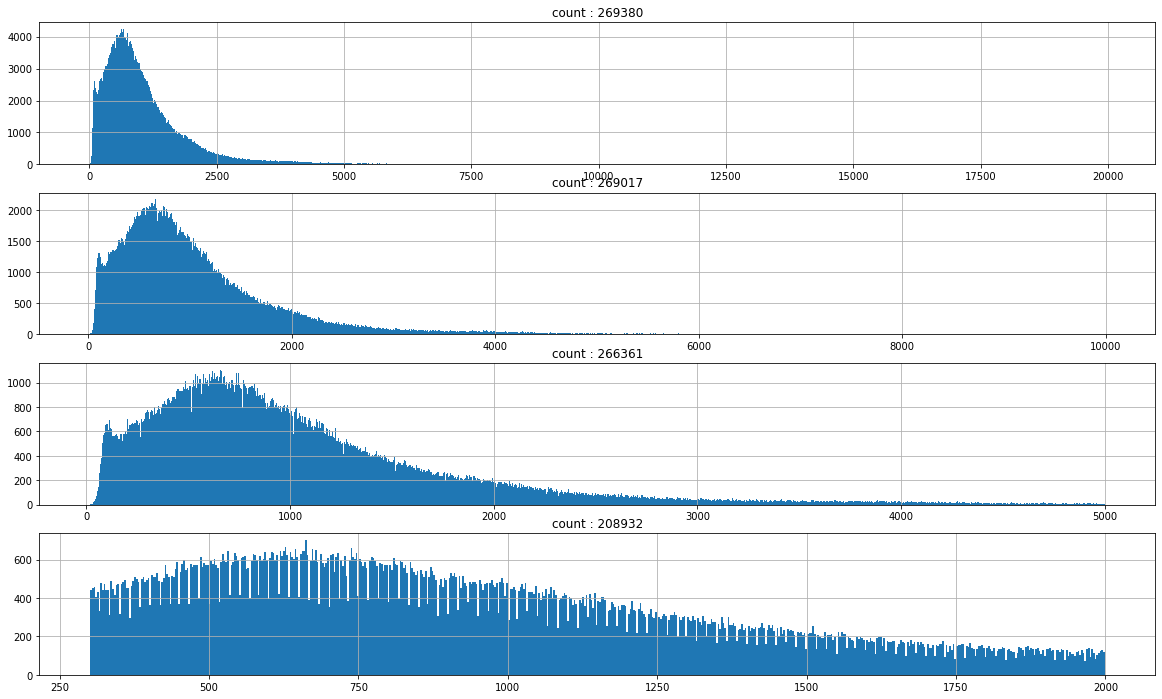

In [427]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.subplot(4,1,1)
condition = (df_drop['character_len']>0) & (df_drop['character_len']<20000)
plt.title(f"count : {len(df_drop[condition])}")
df_drop[condition]['character_len'].hist(bins=1000)
plt.subplot(4,1,2)
condition = (df_drop['character_len']>0) & (df_drop['character_len']<10000)
plt.title(f"count : {len(df_drop[condition])}")
df_drop[condition]['character_len'].hist(bins=1000)
plt.subplot(4,1,3)
condition = (df_drop['character_len']>0) & (df_drop['character_len']<5000)
plt.title(f"count : {len(df_drop[condition])}")
df_drop[condition]['character_len'].hist(bins=1000)
plt.subplot(4,1,4)
condition = (df_drop['character_len']>300) & (df_drop['character_len']<2000)
plt.title(f"count : {len(df_drop[condition])}")
df_drop[condition]['character_len'].hist(bins=600)

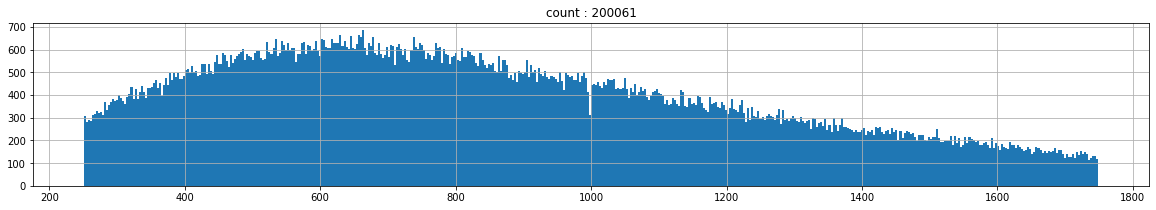

In [462]:
plt.figure(figsize=(20,3))
condition = (df_drop['sentence_len']>3) & (df_drop['sentence_len']<30) & (df_drop['character_len']>250) & (df_drop['character_len']<1750)
plt.title(f"count : {len(df_drop[condition])}")
df_drop[condition]['character_len'].hist(bins=500)

In [475]:
for a in df_drop[condition]['content'].sample(5):
  print(a)
  print()
  print()

조경규 환경부장관은 19일 "전국에서 홍천군 친환경에너지 타운이 선봉이다.<GSG> 앞으로도 계속 발전시켜 국내뿐만 아니라 해외에서도 좋은 모델이 될 것이다"고 말했다.<GSG>조 장관은 이날 홍천군 북방면 소매곡리 친환경에너지타운을 방문해 마을주민들과의 간담회에서 이같이 밝혔다.<GSG> 조 장관은 "홍천군에서도 필요한 것이 있으면 환경부에 요청해서 같이 협조하자"며 "성공적인 모델이 될 수 있도록 함께하자"고 당부했다.<GSG> 마을주민 대표로 장관에게 건의한 유모(74)씨는 "6월 달에 박 대통령이 방문했을 때 겨울철에도 농사 지을 수 있도록 유리온실을 건의했는데 잘 이뤄지지 않았다"며 "부처 간에 업무협조를 통해 실행해 줄 것"을 주문했다.<GSG> 이에 조 장관은 "각 부서랑 연관이 되기 때문에 농림축산식품부랑 협의해 보겠다"고 밝혔다.<GSG> 이날 조 장관을 비롯해 김용국 홍천부군수, 지진수 마을이장 등 30여명은 가축분뇨 바이오가스화시설, 퇴·액비 자원화시설, 태양광발전시설 등을 둘러보며 일정을 마무리 했다.<GSG> 지진수 마을이장은 "앞으로도 마을 분들과 협력해 좋은 모델이 될 수 있도록 노력 하겠다"고 말했다


한국가스공사(사장 장석효)가 가스공급과 무관한 비용 1,021억원을 가스요금에 반영한 것으로 드러났습니다.<GSG>국회 산업통상자원위원회 소속 새정치민주연합 부좌현 의원(안산단원을)이 가스공사와 감사원으로부터 제출받은 자료를 분석한 결과에 따르면 가스공사는 가스요금을 산정하면서 국내 가스공급과 관계없는 해외사업 담당 부서에서 발생한 인건비 292억원과 사업성 경비 380억원 등 총 672억원을 도시가스 공급비용에 반영했습니다.<GSG>또 2010년부터 2013년까지 자원개발 인재양성 및 유관기관 지원에 138억원, 직장 운동부 운영에 2억원, 글로벌 사회 공헌에 10억원, 기타 지역단체 및 유관기관 후원에 106억원 등 총 349억원의 일반적 성격 기부금을 도시가스 공급비용에 반영했습니다.<GSG>도시가스 도매요금 산정을 위한 '천

In [465]:
df_new = df_drop[condition].copy().reset_index(drop=True)
df_new

,title,content,url,character_len,sentence_len
0,경기 부진·코로나19에 2년 연속 저물가,올해 소비자물가상승률 0.5% 사상 처음 2년 연속 0%대 상승 올해 소비자물가가 ...,https://news.naver.com/main/read.naver?mode=LS...,1330,23
1,"""국내 인기 웹사이트 친환경 점수는 낙제점""..그린피스",<GSG>국내 주요 데이터센터들이 재생에너지 사용에 대한 의지 부족<GSG>그린피스...,https://news.naver.com/main/read.naver?mode=LS...,1507,17
2,"귀뚜라미, ‘가스 열병합발전’ 나선다",한국도시가스협회와 사업제휴…시장확대 본격화 귀뚜라미(대표 송경석)가 가스 열병합발전...,https://news.naver.com/main/read.naver?mode=LS...,848,14
3,"경동도시가스, 선암호수공원서 꽃심기 봉사",경동도시가스 사랑나눔 봉사단은 31일 선암호수공원에서 봄맞이 꽃 심기 봉사활동을 실...,https://news.naver.com/main/read.naver?mode=LS...,356,6
4,"""강릉 과학단지 수소폭발 재발방지"" 안전방안·법 제정 추진",정부가 지난 5월 발생한 강릉 과학단지 수소탱크 폭발사고와 같은 일이 또 벌어지는 ...,https://news.naver.com/main/read.naver?mode=LS...,1223,12
...,...,...,...,...,...
200056,<새책>‘에너지 정치경제학’ 출판 다이제스트,▶에너지 정치경제학/이재호 지음/석전력수급도 역시 비상이다.<GSG> 원자력발전소 ...,https://news.naver.com/main/read.naver?mode=LS...,1412,20
200057,12월 소비자물가 4.2%.. 연간 4.0% 상승,이달 소비자물가가 1년전보다 4.2% 상승했습니다.<GSG>통계청이 발표한 소비자 ...,https://news.naver.com/main/read.naver?mode=LS...,450,6
200058,김주호 울산시 교육혁신도시협력관 “신재생·소재 등 R&D센터，울산 우정혁신도시에 유치”,"""신재생에너지 및 소재분야 연구개발(R&D)기관을 우정혁신도시 산.학.연 클러스터에...",https://news.naver.com/main/read.naver?mode=LS...,1239,10
200059,가스公-가스안전公-경동나비엔 등 취약계층 주거복지 통합 지원 협약,"가스공 올해 22억 투입, 복지시설 난방 개선 등한국가스공사는 10월 30일 경기도...",https://news.naver.com/main/read.naver?mode=LS...,1009,10


In [478]:
df_new.to_csv("/<your_dir>/네이버뉴스_GSG_dataset_200061.csv",index=False)

In [479]:
pd.read_csv("/<your_dir>/네이버뉴스_GSG_dataset_200061.csv")

,title,content,url,character_len,sentence_len
0,경기 부진·코로나19에 2년 연속 저물가,올해 소비자물가상승률 0.5% 사상 처음 2년 연속 0%대 상승 올해 소비자물가가 ...,https://news.naver.com/main/read.naver?mode=LS...,1330,23
1,"""국내 인기 웹사이트 친환경 점수는 낙제점""..그린피스",<GSG>국내 주요 데이터센터들이 재생에너지 사용에 대한 의지 부족<GSG>그린피스...,https://news.naver.com/main/read.naver?mode=LS...,1507,17
2,"귀뚜라미, ‘가스 열병합발전’ 나선다",한국도시가스협회와 사업제휴…시장확대 본격화 귀뚜라미(대표 송경석)가 가스 열병합발전...,https://news.naver.com/main/read.naver?mode=LS...,848,14
3,"경동도시가스, 선암호수공원서 꽃심기 봉사",경동도시가스 사랑나눔 봉사단은 31일 선암호수공원에서 봄맞이 꽃 심기 봉사활동을 실...,https://news.naver.com/main/read.naver?mode=LS...,356,6
4,"""강릉 과학단지 수소폭발 재발방지"" 안전방안·법 제정 추진",정부가 지난 5월 발생한 강릉 과학단지 수소탱크 폭발사고와 같은 일이 또 벌어지는 ...,https://news.naver.com/main/read.naver?mode=LS...,1223,12
...,...,...,...,...,...
200056,<새책>‘에너지 정치경제학’ 출판 다이제스트,▶에너지 정치경제학/이재호 지음/석전력수급도 역시 비상이다.<GSG> 원자력발전소 ...,https://news.naver.com/main/read.naver?mode=LS...,1412,20
200057,12월 소비자물가 4.2%.. 연간 4.0% 상승,이달 소비자물가가 1년전보다 4.2% 상승했습니다.<GSG>통계청이 발표한 소비자 ...,https://news.naver.com/main/read.naver?mode=LS...,450,6
200058,김주호 울산시 교육혁신도시협력관 “신재생·소재 등 R&D센터，울산 우정혁신도시에 유치”,"""신재생에너지 및 소재분야 연구개발(R&D)기관을 우정혁신도시 산.학.연 클러스터에...",https://news.naver.com/main/read.naver?mode=LS...,1239,10
200059,가스公-가스안전公-경동나비엔 등 취약계층 주거복지 통합 지원 협약,"가스공 올해 22억 투입, 복지시설 난방 개선 등한국가스공사는 10월 30일 경기도...",https://news.naver.com/main/read.naver?mode=LS...,1009,10
